## 1️⃣ Load Data
**Definition:** Loading time-series data from CSV.
**Use:** Starting point for all analysis.
**Working:** Uses `pd.read_csv()`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('time_series_1000.csv')
df.head()

,date,sales,customers
0,2020-01-01,202,37
1,2020-01-02,448,83
2,2020-01-03,370,48
3,2020-01-04,206,66
4,2020-01-05,171,26


## 2️⃣ Convert `date` to DateTime & Set Index
**Why:** Pandas time-series operations require a DateTimeIndex.
**Working:** `pd.to_datetime()` & `set_index()`.

In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,sales,customers
date,,
2020-01-01,202,37
2020-01-02,448,83
2020-01-03,370,48
2020-01-04,206,66
2020-01-05,171,26


## 3️⃣ Time-Based Slicing
**Use:** Quickly extract a specific time window.
Examples: `'2020-05'`, `'2020-01-15':'2020-02-10'`.

In [4]:
df.loc['2020-05']

,sales,customers
date,,
2020-05-01,234,49
2020-05-02,300,73
2020-05-03,427,31
2020-05-04,367,69
2020-05-05,132,73
2020-05-06,147,81
2020-05-07,161,20
2020-05-08,315,23
2020-05-09,392,69


## 4️⃣ Resampling (Changing Frequency)
**Definition:** Convert daily data → weekly/monthly/yearly.
**Use:** Trend analysis.
**Working:** Aggregation into time buckets.

In [5]:
df['sales'].resample('M').sum()

date
2020-01-31     9697
2020-02-29     8810
2020-03-31     9658
2020-04-30     8981
2020-05-31     9329
2020-06-30     7703
2020-07-31    10547
2020-08-31     9010
2020-09-30     9826
2020-10-31     8819
2020-11-30     9775
2020-12-31     8852
2021-01-31     9050
2021-02-28     9102
2021-03-31     8867
2021-04-30     9775
2021-05-31     8638
2021-06-30     9142
2021-07-31     9839
2021-08-31     9136
2021-09-30    10086
2021-10-31     8468
2021-11-30     9364
2021-12-31     8885
2022-01-31     9419
2022-02-28     8234
2022-03-31     9958
2022-04-30     7975
2022-05-31    10627
2022-06-30     8763
2022-07-31     9038
2022-08-31     8716
2022-09-30     7422
Freq: M, Name: sales, dtype: int64

### 📊 Plot: Monthly Sales Trend

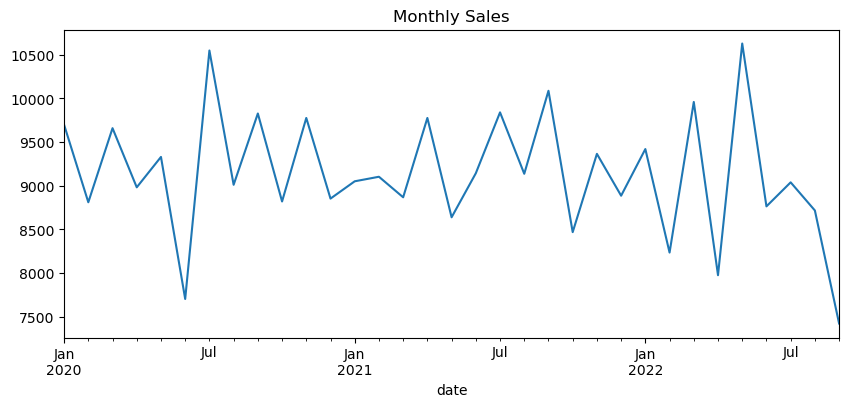

In [6]:
df['sales'].resample('M').sum().plot(figsize=(10,4), title='Monthly Sales'); plt.show()

## 5️⃣ Rolling Windows
**Definition:** Moving-window calculation.
**Use:** Smooth noisy data & detect trends.

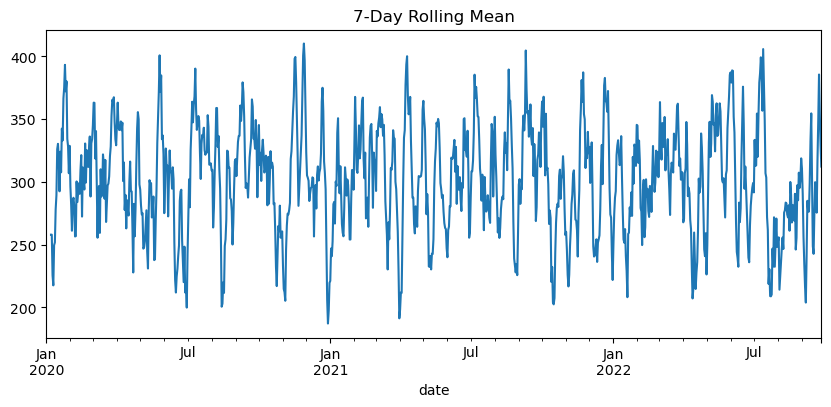

In [7]:
df['sales'].rolling(7).mean().plot(figsize=(10,4), title='7-Day Rolling Mean'); plt.show()

## 6️⃣ Lag / Shift Features
**Use:** Feature engineering for forecasting.
**Working:** `shift(n)` moves values down by n days.

In [8]:
df['sales_lag1'] = df['sales'].shift(1)
df[['sales','sales_lag1']].head()

,sales,sales_lag1
date,,
2020-01-01,202,NaN
2020-01-02,448,202.0
2020-01-03,370,448.0
2020-01-04,206,370.0
2020-01-05,171,206.0


## 7️⃣ Handling Missing Dates
**Use:** Real datasets often have gaps.
**Working:** `asfreq()` inserts missing timestamps.

In [9]:
df_missing = df.asfreq('D')
df_missing.head()

,sales,customers,sales_lag1
date,,,
2020-01-01,202,37,NaN
2020-01-02,448,83,202.0
2020-01-03,370,48,448.0
2020-01-04,206,66,370.0
2020-01-05,171,26,206.0


## 8️⃣ Interpolation for Missing Values
**Definition:** Estimate missing values.
**Use:** Smooth values for analysis/forecasting.

In [10]:
df_missing['sales'].interpolate().head()

date
2020-01-01    202
2020-01-02    448
2020-01-03    370
2020-01-04    206
2020-01-05    171
Freq: D, Name: sales, dtype: int64

## 9️⃣ Time-Based Grouping
**Use:** Extract insights by month, week, year.
**Working:** Access date components via Index.

In [11]:
df.groupby(df.index.month)['sales'].sum()

date
1     28166
2     26146
3     28483
4     26731
5     28594
6     25608
7     29424
8     26862
9     27334
10    17287
11    19139
12    17737
Name: sales, dtype: int64

## 🔟 Time Zone Handling
**Use:** Required for international datasets.
**Working:** Localize → convert.

In [12]:
df_tz = df.tz_localize('UTC').tz_convert('Asia/Kolkata')
df_tz.head()

,sales,customers,sales_lag1
date,,,
2020-01-01 05:30:00+05:30,202,37,NaN
2020-01-02 05:30:00+05:30,448,83,202.0
2020-01-03 05:30:00+05:30,370,48,448.0
2020-01-04 05:30:00+05:30,206,66,370.0
2020-01-05 05:30:00+05:30,171,26,206.0


## 1️⃣1️⃣ Date Offsets (Business Days, Month End)
**Use:** Finance & scheduling tasks.
**Working:** Add offset objects.

In [13]:
df.index + pd.offsets.BDay(3)

DatetimeIndex(['2020-01-06', '2020-01-07', '2020-01-08', '2020-01-08',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-09-21', '2022-09-21', '2022-09-22', '2022-09-23',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-28',
               '2022-09-28', '2022-09-29'],
              dtype='datetime64[ns]', name='date', length=1000, freq=None)

## 1️⃣2️⃣ Expanding Window
**Definition:** Cumulative stats from start.
**Use:** Long-term trend extraction.

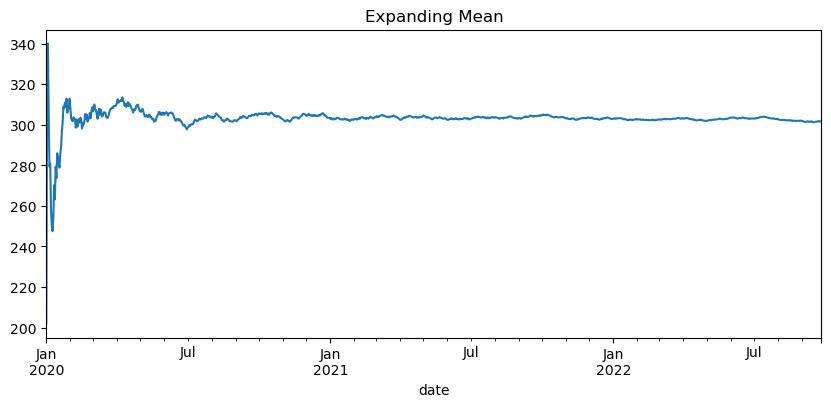

In [14]:
df['sales'].expanding().mean().plot(figsize=(10,4), title='Expanding Mean'); plt.show()

## 1️⃣3️⃣ Time-Series Summary Statistics
**Use:** Quick numerical overview.

In [15]:
df.describe()

,sales,customers,sales_lag1
count,1000.000000,1000.000000,999.000000
mean,301.511000,53.652000,301.594595
std,114.355827,25.912436,114.382532
min,100.000000,10.000000,100.000000
25%,205.000000,31.750000,205.000000
50%,300.500000,53.000000,301.000000
75%,400.250000,75.250000,400.500000
max,499.000000,99.000000,499.000000
